#Algoritimo Genético MultiObjetivo para Imputação Múltipla de Dados Aplicado na Classificação Multirrótulo 

#Importações


In [ ]:
#instalações
#!pip install numpy
!pip install pandas
!pip install scipy
!pip install future
!pip install sklearn
!pip install scikit-multilearn
!pip install liac-arff # for loading ARFF files
!pip install iterative-stratification 
!pip install missingpy

     |████████████████████████████████| 11.7 MB 43 kB/s eta 0:00:01
     |████████████████████████████████| 503 kB 47 kB/s eta 0:00:01
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
     |████████████████████████████████| 39.3 MB 34 kB/s  eta 0:00:01
     |████████████████████████████████| 829 kB 575 kB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=375fea2abf32c1425369d891eb4a18aa02fc9e4b331c73baacf2deb2ca16e91a
  Stored in directory: /home/jacobjr/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Processing /home/jacobjr/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897/sklearn-0.0-py2.py3-none-any.whl
     |████████████████████████████████| 26.7 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 

In [ ]:
import numpy as np
import scipy as sp
import future as ft
import sklearn
from scipy.io import arff
import pandas as pd
#importações poś-intalações
from skmultilearn.dataset import load_dataset
import arff


### Lendo datasets originais do Repositório Mulan

In [ ]:
def load_dataset_(dataset_name):
    from skmultilearn.dataset import load_dataset
    X,y,feature_names,label_names = load_dataset(dataset_name, 'undivided')
    return X.toarray(),y.toarray(),feature_names, label_names

In [ ]:
data = load_dataset_('emotions')

emotions:undivided - does not exists downloading
Downloaded emotions-undivided


### Utilizando os dados originais (uploaded)

In [ ]:
def dataset_emotions():
  from scipy.io.arff import loadarff
  raw_data = loadarff('/content/drive/MyDrive/Colab Notebooks/datasets/emotions.arff')
  df = pd.DataFrame(raw_data[0])
  df["amazed-suprised"] = pd.to_numeric(df["amazed-suprised"])
  df["happy-pleased"] = pd.to_numeric(df["happy-pleased"])
  df["relaxing-calm"] = pd.to_numeric(df["relaxing-calm"])
  df["quiet-still"] = pd.to_numeric(df["quiet-still"])
  df["sad-lonely"] = pd.to_numeric(df["sad-lonely"])
  df["angry-aggresive"] = pd.to_numeric(df["angry-aggresive"])
  labels = ['amazed-suprised','happy-pleased','relaxing-calm','quiet-still','sad-lonely','angry-aggresive']
  #dividindo dataset (features e labels)
  feats_df = df.drop(columns = labels).values
  labels_df = df[labels].values
  return df,feats_df,labels_df

In [ ]:
def counter(y):
  from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
  from collections import Counter
  distribuicao_labels = Counter(combination for row in get_combination_wise_output_matrix(y, order=1) for combination in row)
  return distribuicao_labels


In [ ]:
counter(data[1])

Counter({(1,): 166, (2,): 264, (0,): 173, (5,): 189, (3,): 148, (4,): 168})




## Aplicando Validação Cruzada k-fold 
Testes iniciais com 10-folds

In [ ]:
#X,y in numpy format
def cross_validation(X,y,num_folds, randon_state=0):
  from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
  mskf = MultilabelStratifiedKFold(n_splits=num_folds, shuffle=True, random_state=0)
  for train_index, test_index in mskf.split(X, y):
   #print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
  return X_train, X_test, y_train, y_test

In [ ]:
data_train_and_test = cross_validation(data[0], data[1],10)

In [ ]:
X_train = data_train_and_test[0]
X_test = data_train_and_test[1]
y_train = data_train_and_test[2]
y_test = data_train_and_test[3]

#Exibindo informações do dataset trabalhado

In [ ]:
#verificando a presença de valores ausentes
def missing_values(df):
  amount = (df.isna().sum()).sum()
  return amount

In [ ]:
valores_ausentes = missing_values(pd.DataFrame(X_train))
valores_ausentes

0

In [ ]:
#padronização Dataset de teste
#X in numpy format
def padronizacao(X):
  from sklearn.preprocessing import StandardScaler
  scl = StandardScaler()
  X_scaler = scl.fit_transform(X)
  return X_scaler



In [ ]:
X_train

array([[0.034741, 0.089665, 0.091225, ..., 0.245457, 0.105065, 0.405399],
       [0.081374, 0.272747, 0.085733, ..., 0.343547, 0.276366, 0.710924],
       [0.110545, 0.273567, 0.08441 , ..., 0.188693, 0.045941, 0.457372],
       ...,
       [0.035169, 0.065403, 0.075227, ..., 0.184313, 0.247136, 0.476993],
       [0.054276, 0.238158, 0.095935, ..., 0.547126, 0.183494, 1.25582 ],
       [0.073194, 0.140733, 0.080545, ..., 0.087328, 0.236815, 0.451701]])

In [ ]:
X_test_s = padronizacao(X_train)
X_test_s

array([[-1.10787768, -0.89931277,  0.59716409, ..., -0.48531477,
        -0.69145912, -0.83319228],
       [ 0.38570926,  0.64625217,  0.00479793, ..., -0.20020473,
        -0.22647793, -0.37268296],
       [ 1.32001383,  0.65317455, -0.13790062, ..., -0.65030597,
        -0.85194592, -0.75485482],
       ...,
       [-1.09416947, -1.10413081, -1.1283774 , ..., -0.66303695,
        -0.30582014, -0.72528064],
       [-0.48220014,  0.35425435,  1.10518387, ...,  0.39152141,
        -0.47857064,  0.44862358],
       [ 0.1237158 , -0.46820043, -0.55477884, ..., -0.94493518,
        -0.33383557, -0.76340256]])

#Amputando dataset

*   Mecanismo VA: MCAR



Quantificando os percentuais de valores ausentes de acordo com cada database

In [ ]:
#retorna um lista com as posições com Valores ausentes e o dataset amputado
def amputation(rate, X):
  from numpy import random

  amount_missing_values = int(X.size * rate)
  print('Total dados: '+str(X.size)+'\n Total VAs: '+str(amount_missing_values)+'\n')

  rows = X.shape[0]
  cols = X.shape[1]
  index_list = []
  df = pd.DataFrame(X)

  while(len(index_list)<amount_missing_values):
    a = 0
    b = 0
    row = random.randint(0,rows)
    col = random.randint(0,cols)
    if(a != row and b != col):
      a = row
      b = col
      df.iloc[row,col] = np.nan
      index_list.append([row,col])
  return df, index_list

In [ ]:
a = amputation(0.25, X_train)

Total dados: 38160
 Total VAs: 9540



In [ ]:
a[0]

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.118630,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399
1,0.081374,0.272747,0.085733,-62.584437,3.183163,NaN,0.163038,NaN,0.458514,0.041426,...,NaN,NaN,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,NaN
2,0.110545,0.273567,0.084410,-65.235325,NaN,NaN,NaN,NaN,0.489412,0.627636,...,0.079917,0.085821,0.161574,61.0,0.000000,NaN,3.0,0.188693,0.045941,0.457372
3,0.042481,0.199281,0.093447,-80.305152,5.824409,NaN,1.754870,1.495532,0.739909,NaN,...,0.129145,0.122330,0.043012,66.0,0.206562,132.0,2.0,NaN,0.241934,0.351009
4,0.074550,NaN,0.079789,-93.697749,5.543229,1.064262,NaN,0.890336,0.702328,0.490685,...,0.284196,0.189988,0.029308,NaN,0.144039,200.0,2.0,NaN,0.310801,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.027142,NaN,0.072043,-79.881347,NaN,1.927310,NaN,0.397888,NaN,0.302742,...,0.129552,NaN,0.089991,87.0,0.564842,NaN,NaN,0.261742,NaN,1.149211
526,0.094829,NaN,0.082824,-61.364436,2.966229,0.627740,1.440352,NaN,1.110282,0.394450,...,0.128090,0.167160,0.035827,NaN,NaN,130.0,NaN,0.282122,NaN,NaN
527,0.035169,0.065403,NaN,NaN,NaN,0.092224,0.818851,1.569606,1.831909,0.057216,...,NaN,0.098238,0.033681,88.0,0.000000,NaN,NaN,NaN,NaN,0.476993
528,0.054276,0.238158,NaN,-71.009724,3.181340,1.547197,NaN,0.618838,0.997950,0.825143,...,0.080006,0.058181,0.155650,84.0,0.276695,168.0,2.0,0.547126,NaN,NaN


In [ ]:
total_nan = (a[0].isnull().sum()).sum()
total_nan

8401

In [ ]:
def grafic_bar_missing_values(df):
  import missingno as msno
  msno.bar(df)

In [ ]:
def grafic_matrix_missing_values(df):
  import missingno as msno
  msno.matrix(df)

In [ ]:
#!pip install missingno

     |████████████████████████████████| 11.3 MB 57 kB/s eta 0:00:01
     |████████████████████████████████| 292 kB 41 kB/s eta 0:00:01
     |████████████████████████████████| 895 kB 58 kB/s eta 0:00:01
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


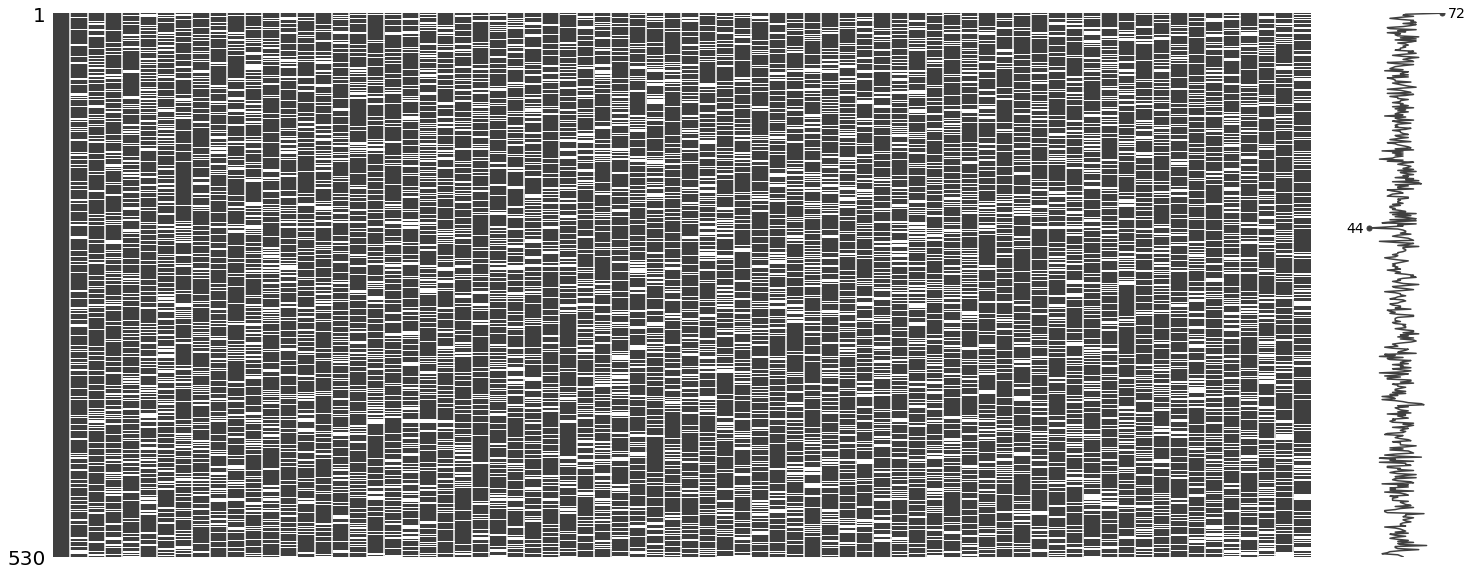

In [ ]:
grafic_matrix_missing_values(pd.DataFrame(a[0]))

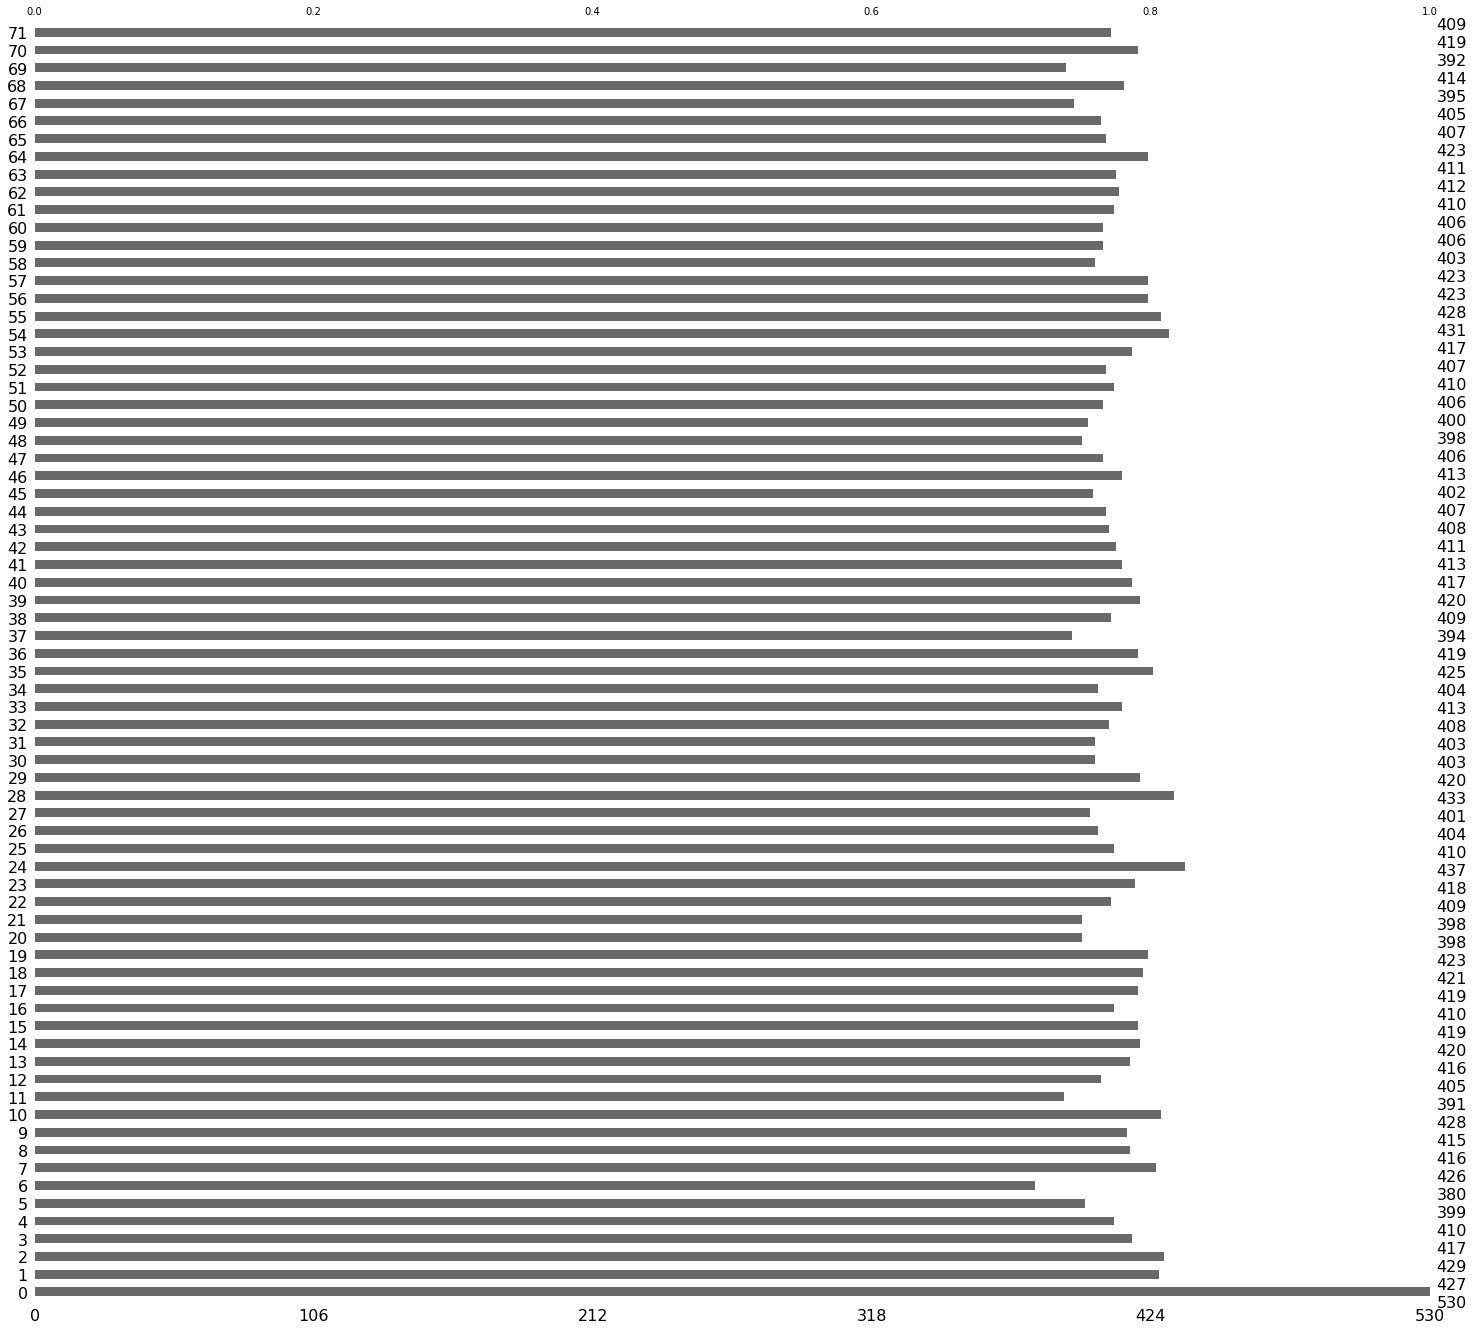

In [ ]:
grafic_bar_missing_values(pd.DataFrame(a[0]))

In [ ]:
def grafic_line_missing_values(df):
  import matplotlib.pyplot as plt 
  plt.figure(figsize=(20,3))
  plt.plot(df.isnull().sum(),marker='o')
  plt.title("Distribuição de Missing Values por features")
  plt.show()

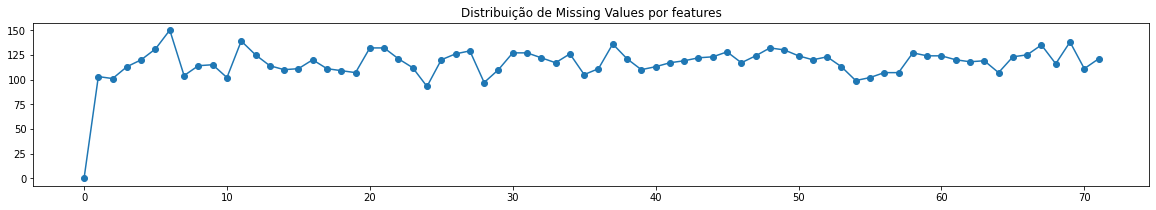

In [ ]:
grafic_line_missing_values(pd.DataFrame(a[0]))

In [ ]:
def describe(df):
  return df.describe()

In [ ]:
describe(pd.DataFrame(data[0]))

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.069309,0.195399,0.085695,-72.998228,4.979178,0.602395,1.694625,0.634156,0.833964,0.508060,...,0.109876,0.107114,0.230008,74.456998,0.247854,155.215852,2.099494,0.412940,0.354901,0.959906
std,0.031293,0.117605,0.009260,7.580804,2.071792,1.017603,0.606581,0.448746,0.368312,0.303277,...,0.053819,0.059361,0.295863,14.610203,0.366541,29.807954,0.316040,0.339559,0.362262,0.651827
min,0.010201,0.038286,0.070932,-99.090802,0.051474,-2.277307,-0.604609,-1.143864,-0.237114,-0.444623,...,0.032472,0.031945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044781,0.107742,0.079018,-77.078349,3.409922,-0.113441,1.307242,0.373195,0.605057,0.309033,...,0.075211,0.071286,0.047611,64.000000,0.007556,132.000000,2.000000,0.179411,0.099424,0.513974
50%,0.065251,0.169757,0.083637,-72.474302,4.642338,0.588380,1.731031,0.618838,0.819652,0.534665,...,0.096668,0.088687,0.104043,71.000000,0.077408,150.000000,2.000000,0.309902,0.246193,0.804229
75%,0.086290,0.257668,0.091323,-68.292848,6.439446,1.293202,2.072488,0.925091,1.051206,0.708430,...,0.125772,0.121432,0.278203,84.000000,0.325489,180.000000,2.000000,0.529859,0.472593,1.242089
max,0.195412,0.698277,0.159460,-56.297652,12.069754,3.910873,4.382370,2.252710,2.358098,1.484489,...,0.471506,0.415202,1.598533,115.000000,1.762948,237.000000,3.000000,1.795128,1.797765,3.422899


In [ ]:
#Instalando o panda profile
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport

#Imputação de dados


*   k-Nearest Neighbors (kNN) Imputation
*   mean
*   most_frequent
*   median







# Criação da população inicial

A população inicial é formada por variações do imputações simples, ou seja, cada indivíduo é um dataset completo com um técnica ou configuração diferente de imputação.

In [ ]:
from sklearn.impute import KNNImputer
def knnImp(dataset_amputed,neighbors):
  inputer_knn = KNNImputer(n_neighbors=neighbors)
  X_imputed_knn = inputer_knn.fit_transform(dataset_amputed)
  return X_imputed_knn

In [ ]:
def rfImp(dataset_amputed):
  from missingpy import MissForest
  imputer_RFI = MissForest()
  X_imputed_RFI = imputer_RFI.fit_transform(dataset_amputed)
  return X_imputed_RFI

In [ ]:
def meanImp(dataset_amputed):
  from sklearn.impute import SimpleImputer
  imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer_mean=imputer_mean.fit(dataset_amputed)
  X_imputed_mean = imputer_mean.transform(dataset_amputed)
  return X_imputed_mean

In [ ]:
def mostFrequentImp(dataset_amputed):
  from sklearn.impute import SimpleImputer
  imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imputer_most_frequent=imputer_most_frequent.fit(dataset_amputed)
  X_imputed_most_frequent=imputer_most_frequent.transform(dataset_amputed)
  return X_imputed_most_frequent

In [ ]:
def medianImp(dataset_amputed):
  from sklearn.impute import SimpleImputer
  imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
  imputer_median=imputer_median.fit(dataset_amputed)
  X_imputed_median=imputer_median.transform(dataset_amputed)
  return X_imputed_median

In [ ]:
def imputation(method, df):
  #import gerais
  import sklearn.neighbors._base
  import sys
  sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
  

  if method == 'mean':
    base_imputada = meanImp(df)
  elif method == 'median':
    base_imputada = medianImp(df)
  elif method == 'most_frequent':
    base_imputada = mostFrequentImp(df)
  elif method == 'knn-3':
    base_imputada = knnImp(df,3)
  elif method == 'knn-5':
    base_imputada = knnImp(df,5)
  elif method == 'knn-10':
    base_imputada = knnImp(df,10)
  return base_imputada


Padronização dos dados

In [ ]:
imputation_meth  = ['knn-3','knn-5','knn-10', 'mean', 'most_frequent', 'median']
inds = []
df_amp = pd.DataFrame(a[0])
for i  in imputation_meth:
  inds.append(imputation(i,df_amp))

In [ ]:
inds

[array([[0.034741  , 0.089665  , 0.091225  , ..., 0.245457  , 0.105065  ,
         0.405399  ],
        [0.081374  , 0.272747  , 0.085733  , ..., 0.343547  , 0.276366  ,
         0.55982467],
        [0.110545  , 0.273567  , 0.08441   , ..., 0.188693  , 0.045941  ,
         0.457372  ],
        ...,
        [0.035169  , 0.065403  , 0.07922533, ..., 0.3434    , 0.33011633,
         0.476993  ],
        [0.054276  , 0.238158  , 0.080122  , ..., 0.547126  , 0.71954233,
         1.21660733],
        [0.073194  , 0.140733  , 0.080545  , ..., 0.224925  , 0.09307067,
         0.451701  ]]),
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.343547 , 0.276366 ,
         0.6547044],
        [0.110545 , 0.273567 , 0.08441  , ..., 0.188693 , 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.078842 , ..., 0.3074762, 0.4530174,
         0.476993 ],
        [0.054276 , 0.238158 , 0.080

In [ ]:
len(inds)

6

Normmalização da população inicial

In [ ]:
populationInitial = inds
#for i in range(len(populationInitial)):
#  populationInitial.append(padronizacao(populationInitial[i]))

In [ ]:
len(populationInitial)

6

In [ ]:
inds[0].shape, populationInitial[0].shape

((530, 72), (530, 72))

In [ ]:
X_train.shape, y_train.shape

((530, 72), (530, 6))

In [ ]:
np.unique(y_test)

array([0, 1])

# Função Fitness

Os indivíduos da população são avaliados no aprendizado multirrótulo.
Neste experimento, serão testados algorítmos que transformam o problema e algorítmos que adaptam o problema.

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def evaluation_BinaryRelevance(core_algorithm, individual):
  p = []
  if core_algorithm == 'svm':
    classifier_br = BinaryRelevance(classifier=SVC(C=50),require_dense=[False, True])#
    classifier_br.fit(individual, y_train)
    prediction_br = classifier_br.predict(X_test)

    F1 = f1_score(y_test, prediction_br, average='micro')
    ACC = accuracy_score(y_test, prediction_br)
    HL = hamming_loss(y_test, prediction_br)

  elif core_algorithm == 'randomForest':
    classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
    classifier.fit(individual, y_train)
    prediction_br_RFC=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_RFC, average='micro')
    ACC = accuracy_score(y_test, prediction_br_RFC)
    HL = hamming_loss(y_test, prediction_br_RFC)
  elif core_algorithm == '3nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=3))
    classifier.fit(individual, y_train)
    prediction_br_3knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_3knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_3knn)
    HL = hamming_loss(y_test, prediction_br_3knn)
  elif core_algorithm == '5nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier())
    classifier.fit(individual, y_train)
    prediction_br_5knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_5knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_5knn)
    HL = hamming_loss(y_test, prediction_br_5knn)
  elif core_algorithm == '10nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=10))
    classifier.fit(individual, y_train)
    prediction_br_10knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_10knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_10knn)
    HL = hamming_loss(y_test, prediction_br_10knn) 
  elif core_algorithm == 'lr':
    from sklearn.linear_model import LogisticRegression
    classifier = BinaryRelevance(classifier = LogisticRegression())
    classifier.fit(individual, y_train)
    prediction_br_lr=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_lr, average='micro')
    ACC = accuracy_score(y_test, prediction_br_lr)
    HL = hamming_loss(y_test, prediction_br_lr)
  return ACC,F1,HL

Avaliação com Classificador Binary Relevance - Metricas: Exact Match, Accuracy and Hamming Loss

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Exact Match
def acc_multi(y_true, y_pred):
  class_accuracies = []
  for class_ in np.unique(y_true):
    #print('classe:', class_)
    #print('y_pred[y_true == class_]: ',y_pred[y_true == class_])
    #print('y_pred[y_true == class_] == class_: ',y_pred[y_true == class_] == class_)
    class_acc = np.mean(y_pred[y_true == class_] == class_)
    #print('class_acc:',class_acc)
    class_accuracies.append(class_acc)
    #print('------------------------------')
  #for i in class_accuracies:
    #print(i)
    
  return np.mean(class_accuracies)

def example_based_accuracy(y_true, y_pred):
    
    # compute true positives using the logical AND operator
    numerator = np.sum(np.logical_and(y_true, y_pred), axis = 1)

    # compute true_positive + false negatives + false positive using the logical OR operator
    denominator = np.sum(np.logical_or(y_true, y_pred), axis = 1)
    instance_accuracy = numerator/denominator

    avg_accuracy = np.mean(instance_accuracy)
    return avg_accuracy

#ex_based_accuracy = example_based_accuracy(y_true, y_pred)
#print(f"Example Based Accuracy: {ex_based_accuracy}")

def evaluation_multirrotulo(core_algorithm, individual):
  p = []
  if core_algorithm == 'svm':
    classifier_br = BinaryRelevance(classifier=SVC(C=50),require_dense=[False, True])#
    classifier_br.fit(individual, y_train)
    prediction_br = classifier_br.predict(X_test)


    F1 = f1_score(y_test, prediction_br, average='micro')
    #ACC2 = example_based_accuracy(y_test, prediction_br)
    EM = accuracy_score(y_test, prediction_br) #EM in multi é equivante a ACC em binário Classifier
    ACC = acc_multi(y_test, prediction_br)
    HL = hamming_loss(y_test, prediction_br)
    #print('ACC = ', EM)

  elif core_algorithm == 'randomForest':
    classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
    classifier.fit(individual, y_train)
    prediction_br_RFC=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_RFC, average='micro')
    EM = accuracy_score(y_test, prediction_br_RFC)
    HL = hamming_loss(y_test, prediction_br_RFC)
    ACC = acc_multi(y_test, prediction_br_RFC)

  elif core_algorithm == '3nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=3))
    classifier.fit(individual, y_train)
    prediction_br_3knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_3knn, average='micro')
    EM = accuracy_score(y_test, prediction_br_3knn)
    HL = hamming_loss(y_test, prediction_br_3knn)
    ACC = acc_multi(y_test, prediction_br_3knn)
  elif core_algorithm == '5nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier())
    classifier.fit(individual, y_train)
    prediction_br_5knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_5knn, average='micro')
    EM = accuracy_score(y_test, prediction_br_5knn)
    HL = hamming_loss(y_test, prediction_br_5knn)
    ACC = acc_multi(y_test, prediction_br_5knn)
  elif core_algorithm == '10nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=10))
    classifier.fit(individual, y_train)
    prediction_br_10knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_10knn, average='micro')
    EM = accuracy_score(y_test, prediction_br_10knn)
    HL = hamming_loss(y_test, prediction_br_10knn) 
    ACC = acc_multi(y_test, prediction_br_10knn)
  elif core_algorithm == 'lr':
    from sklearn.linear_model import LogisticRegression
    classifier = BinaryRelevance(classifier = LogisticRegression())
    classifier.fit(individual, y_train)
    prediction_br_lr=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_lr, average='micro')
    EM = accuracy_score(y_test, prediction_br_lr)
    HL = hamming_loss(y_test, prediction_br_lr)
    ACC = acc_multi(y_test, prediction_br_lr)
  return EM,ACC,HL

In [ ]:
acc_multi(np.array([[1,1,0],[1,1,0]]),np.array([[0,1,0],[1,1,0]]))
#output
#classe: 0
#y_pred[y_true == class_]:  [0 0]
#y_pred[y_true == class_] == class_:  [ True  True]
#class_acc: 1.0
#------------------------------
#classe: 1
#y_pred[y_true == class_]:  [0 1 1 1]
#y_pred[y_true == class_] == class_:  [False  True  True  True]
#class_acc: 0.75
#------------------------------
#0.875

0.875

Não executando Random Forest devido também ser um algorítmo que funciona como bagging

In [ ]:
def melhor_ind_(populacao,index=0):
  #EM[0][0][0],ACC[0][0][1],HL[0][0][2]
  best = populacao[0]
  #print(best[0][0])
  for ind in populacao:
    next = ind
    #print(next[0][0])
    #break
    if next[0][0]>best[0][0] :
      best = next
    elif next[0][0] == best[0][0]:
      if next[0][1]>best[0][1]:
        best = next
      elif next[0][1] == best[0][1]:
        if next[0][2]<best[0][2]:
          best = next
        else:
          best = best
      else:
        best = best
    print(best[0][0])      
  return best

In [ ]:
def ordenacao_populacao(populacao,index=0):
  best = populacao[index]
  s = []
  if(len(populacao)<2):
    s.append(best)
  else:
    next = populacao[index+1]
    print(best)
    print('-----------------------------')
    print(next)
    print('-----------------------------')
    print(next[0][0])
    print('tamanho da população atual: ', len(populacao))
    print('lista de individuos ordenados: ', len(s))
    if(next[0][0]>best[0][0]):
      print('melhor EM')
      best = next
      s.append(best)
      populacao.pop(index+1)
    elif next[0][0] == best[0][0]:
      if next[0][1]>best[0][1]:
        print('melhor ACC')
        best = next
        s.append(best)
        populacao.pop(index+1)
      elif next[0][1] == best[0][1]:
        if next[0][2]<best[0][2]:
          print('melhor HL')
          best = next
          s.append(best)
          populacao.pop(index+1)
        else:
          print('O atual é o melhror')
          s.append(best)
          populacao.pop(index)
      else:
        print('else ACC')
        s.append(best)
        print('index', index)
        print('removido',populacao.pop(index))
    else:
      print('else EM')
      s.append([best])
      print('index', index)
      populacao.pop(index)
    print(len(s))
    s.append(ordenacao_populacao(populacao, index+1))
    print('tamanho da lista recurs: ', len(s))
  return s

Avaliando os individuos da população

In [ ]:
def fitness_multiObjetivo(population,base_algoritmo):
  sort_pop = []
  metrica = []
  bests = []
  aval_total_ind = []
  populacao = []
  sort_dsc=[]
  sort_asc=[]
  indivuduos = {}
  accuracy = {}
  #print('tam_pop_atual: ',len(population))
  print('Avaliação com Binary Relevance - População com '+str(len(population))+' individuos')
  indexx = 0
  for i in range(len(population)):
    #print('Individual - ',i)
    E,A,H = evaluation_multirrotulo(base_algoritmo, population[indexx])
    print('ind:['+str(i)+'] - '+str(E)+' '+ str(A)+' '+str(H) )
    
    #realizando o calculo multiobjetivo: sum = acc+f1-hl
    #sum = E+A-H
    metrica.append([E,A,H])
    populacao.append([[E,A,H], population[indexx]])
    indexx = indexx+1
    sort_dsc=[]
    sort_asc=[]
    melhor =''
    pior=''
  #fitness = melhor_ind_(populacao)
  return sorted(populacao, key=lambda x: x[0][0], reverse=True)

In [ ]:
r = fitness_multiObjetivo(populationInitial,'svm')

Avaliação com Binary Relevance - População com 6 individuos
ind:[0] - 0.2222222222222222 0.664314789687924 0.2328042328042328
ind:[1] - 0.2222222222222222 0.6704884667571235 0.23544973544973544
ind:[2] - 0.2222222222222222 0.660583446404342 0.23809523809523808
ind:[3] - 0.20634920634920634 0.6496268656716417 0.24603174603174602
ind:[4] - 0.07936507936507936 0.5893826322930801 0.25925925925925924
ind:[5] - 0.20634920634920634 0.660583446404342 0.23809523809523808


In [ ]:
for i in r:
  print(i[0])

[0.2222222222222222, 0.664314789687924, 0.2328042328042328]
[0.2222222222222222, 0.6704884667571235, 0.23544973544973544]
[0.2222222222222222, 0.660583446404342, 0.23809523809523808]
[0.20634920634920634, 0.6496268656716417, 0.24603174603174602]
[0.20634920634920634, 0.660583446404342, 0.23809523809523808]
[0.07936507936507936, 0.5893826322930801, 0.25925925925925924]


In [ ]:
r[1]

[[0.2222222222222222, 0.6704884667571235, 0.23544973544973544],
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.343547 , 0.276366 ,
         0.6547044],
        [0.110545 , 0.273567 , 0.08441  , ..., 0.188693 , 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.078842 , ..., 0.3074762, 0.4530174,
         0.476993 ],
        [0.054276 , 0.238158 , 0.0809624, ..., 0.547126 , 0.5272744,
         1.4028562],
        [0.073194 , 0.140733 , 0.080545 , ..., 0.2473942, 0.1669178,
         0.451701 ]])]

# Seleção

O processo de seleçãp é dado por torneio, sorteando dois pais

In [ ]:
import random
def selecao(pop_atual):
  sorteio1 = random.choice(range(len(pop_atual)))
  #print(sorteio1)
  sorteio2 = random.choice(range(len(pop_atual)))
  #print(sorteio2)
  pai1 = pop_atual[sorteio1]
  pai2 = pop_atual[sorteio2]
  if(pai1[0][0] >= pai2[0][0]):
    return pai1
  else:
    return pai2

In [ ]:
selecao(r)

[[0.2222222222222222, 0.6704884667571235, 0.23544973544973544],
 array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.343547 , 0.276366 ,
         0.6547044],
        [0.110545 , 0.273567 , 0.08441  , ..., 0.188693 , 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.078842 , ..., 0.3074762, 0.4530174,
         0.476993 ],
        [0.054276 , 0.238158 , 0.0809624, ..., 0.547126 , 0.5272744,
         1.4028562],
        [0.073194 , 0.140733 , 0.080545 , ..., 0.2473942, 0.1669178,
         0.451701 ]])]

#Cruzamento

Cruzamento de n-points

In [ ]:
#indeces com a posição do valores ausentes
index_vas = a[1]

In [ ]:
index_vas

[[255, 69],
 [383, 41],
 [96, 52],
 [54, 44],
 [14, 62],
 [303, 11],
 [118, 64],
 [188, 56],
 [318, 16],
 [194, 38],
 [49, 64],
 [243, 41],
 [466, 51],
 [413, 43],
 [297, 33],
 [336, 9],
 [316, 22],
 [24, 6],
 [509, 37],
 [99, 56],
 [406, 68],
 [511, 57],
 [114, 58],
 [310, 45],
 [437, 6],
 [48, 35],
 [282, 53],
 [213, 58],
 [298, 15],
 [434, 29],
 [83, 60],
 [65, 45],
 [475, 9],
 [492, 20],
 [86, 20],
 [285, 23],
 [411, 24],
 [193, 71],
 [76, 40],
 [128, 26],
 [75, 17],
 [119, 47],
 [204, 51],
 [58, 43],
 [292, 64],
 [131, 8],
 [55, 36],
 [148, 51],
 [274, 66],
 [409, 56],
 [225, 18],
 [359, 46],
 [133, 5],
 [235, 20],
 [222, 48],
 [352, 42],
 [389, 20],
 [111, 21],
 [473, 18],
 [271, 66],
 [400, 48],
 [383, 55],
 [232, 14],
 [69, 17],
 [427, 35],
 [120, 13],
 [134, 41],
 [472, 71],
 [332, 69],
 [356, 32],
 [81, 62],
 [378, 6],
 [356, 7],
 [473, 26],
 [42, 13],
 [129, 59],
 [339, 70],
 [51, 12],
 [274, 69],
 [246, 21],
 [472, 34],
 [445, 64],
 [437, 42],
 [395, 41],
 [515, 30],
 [489,

In [ ]:
def crossover(list_index_vas,n_points, new_population, tam_population):
  quantidade_sem_mutacoes = tam_population - int(tam_population*0.8)
  nova_populacao_com_crossover = []
  #adiciona os melhores, com exceção do elitista, na próxima geração
  #o elitista já é passado diretamente para a próxima geração avaliada
  for i in range(1,quantidade_sem_mutacoes):
    melhor = new_population.pop(i)
    #melhores = new_population[1]
    #print('melhor'+str(i)+': '+type(melhor[1]))
    nova_populacao_com_crossover.append(melhor[1])
  while(len(nova_populacao_com_crossover)<int(tam_population)-1):
    sorteio1 = random.choice(range(len(new_population)))
    #escolha dos pais que terão materiais trocados
    #print(sorteio1)
    sorteio2 = random.choice(range(len(new_population)))
    #print(sorteio2)
    #print(len(nova_populacao_com_crossover))
    while(sorteio1 == sorteio2):
      sorteio2 = random.choice(range(len(new_population)))
    pai1 = new_population[sorteio1]
    pai2 = new_population[sorteio2]

    df_pai1 = pd.DataFrame(pai1[1])
    df_pai2 = pd.DataFrame(pai2[1])
  
    genes_all_pai1 = []

    genes_all_pai2 = []

    #recuperando os genes de cada pai
    for i in list_index_vas:
      genes_all_pai1.append(df_pai1.iloc[i[0],i[1]])
      genes_all_pai2.append(df_pai2.iloc[i[0],i[1]])
    #dividindo os genes de acordo com o n_points
    divide_genes_pai_1 = np.array_split(genes_all_pai1,n_points)
    divide_genes_pai_2 = np.array_split(genes_all_pai2,n_points)

    genes_0_pai1 = divide_genes_pai_1[0]
    genes_1_pai1 = divide_genes_pai_1[1]

    genes_0_pai2 = divide_genes_pai_2[0]
    genes_1_pai2 = divide_genes_pai_2[1]

    t1 = len(genes_1_pai1)
    t2 = len(genes_1_pai2)

    divide_list_index = np.array_split(list_index_vas,n_points)
    primeira_parte = divide_list_index[0]
    segunda_parte = divide_list_index[1]

    genes_parte_2_pai1 = genes_1_pai1.tolist()
    genes_parte_2_pai2 = genes_1_pai2.tolist()

    #Trocando genes dos pais
    index = 0
    for i in segunda_parte:
      df_pai1.iloc[i[0].astype(int), i[1].astype(int)] = genes_1_pai2[index]
      df_pai2.iloc[i[0].astype(int), i[1].astype(int)] = genes_1_pai1[index]
      index = index +1
    filho1 = df_pai1
    nova_populacao_com_crossover.append(filho1.to_numpy())

    if(len(nova_populacao_com_crossover)<tam_population):
      filho2 = df_pai2
      nova_populacao_com_crossover.append(filho2.to_numpy())
  #filho1, filho2,pai1[1],pai1[2]
  print('Tamanho da nova população gerada por meio do cruzamento:',len(nova_populacao_com_crossover))
  return nova_populacao_com_crossover

In [ ]:
nova_populacao_recombinada = crossover(index_vas,2,r,10)
#print('tam_pop'+str(len(nova_populacao_recombinada)))
nova_populacao_recombinada

Tamanho da nova população gerada por meio do cruzamento: 9


[array([[0.034741 , 0.089665 , 0.091225 , ..., 0.245457 , 0.105065 ,
         0.405399 ],
        [0.081374 , 0.272747 , 0.085733 , ..., 0.343547 , 0.276366 ,
         0.6547044],
        [0.110545 , 0.273567 , 0.08441  , ..., 0.188693 , 0.045941 ,
         0.457372 ],
        ...,
        [0.035169 , 0.065403 , 0.078842 , ..., 0.3074762, 0.4530174,
         0.476993 ],
        [0.054276 , 0.238158 , 0.0809624, ..., 0.547126 , 0.5272744,
         1.4028562],
        [0.073194 , 0.140733 , 0.080545 , ..., 0.2473942, 0.1669178,
         0.451701 ]]),
 array([[0.034741  , 0.089665  , 0.091225  , ..., 0.245457  , 0.105065  ,
         0.405399  ],
        [0.081374  , 0.272747  , 0.085733  , ..., 0.343547  , 0.276366  ,
         0.55982467],
        [0.110545  , 0.273567  , 0.08441   , ..., 0.188693  , 0.045941  ,
         0.457372  ],
        ...,
        [0.035169  , 0.065403  , 0.07922533, ..., 0.421802  , 0.33011633,
         0.476993  ],
        [0.054276  , 0.238158  , 0.08559945, ...

# Mutação

In [ ]:
def mutacao(dX_amputed,ind, list_missing_values):
  import random
  #de numpy para pandas format
  ind = pd.DataFrame(ind)
  #serão selecionados x% de individuos da população e são trocadas todas as solucões
  #candidatas já imputadas por uma nova solução da pool de soluções
  #amount_inds_mutation = int(rate_mutation *  len(inds_pop))
  for i in list_missing_values:
    #criando um pool solutions de acordo com a o valor de x da lista de index
    lista_do_indice_atual = dX_amputed.iloc[:,i[1]]
    #removendo o indices NaN para criar a pool solutions só com soluções candatas não-nulas
    pool_solutions = [x for x in lista_do_indice_atual if pd.isnull(x) == False]
    #substituindo o gene do indivíduo por um dos genes da pool solutions
    #print('index: ', i[0],',', i[1])
    #print('antes: ',ind.iloc[i[0],i[1]])
    ind.iloc[i[0],i[1]] = random.choice(pool_solutions)
    #print('depois: ',ind.iloc[i[0],i[1]])
  return ind.to_numpy()

In [ ]:
#ind = mutacao(df_amp)

In [ ]:
def mutations(dX_amputed,population, rate_mutation,list_missing_values):
  populacao_cruzada = population.copy()
  amount_inds_mutation = int(rate_mutation *  len(populacao_cruzada))
  i = 0
  while(i < amount_inds_mutation):
    #o sorteado não pode ser o elitistista
    sorteado = random.choice(range(1,len(population)))
    ind_escolhido_pra_mutacao = populacao_cruzada.pop(sorteado)
    ind_mutado = mutacao(dX_amputed, ind_escolhido_pra_mutacao,list_missing_values)
    populacao_cruzada.append(ind_mutado)   
    i=i+1
  return populacao_cruzada

# Algoritmo Genético



1.   elitisimo: 1
2.   gerações: 6
3.   geracoes_sizes{6,12,18,24,30}
4.   cruzamento: n-points
5.   cruzamento: torneio



In [ ]:
def nova_populacao(df_amp,individuo_elitista, pop_atual, tam_population,n_points, list_index_vas=index_vas):
  formacao_nova_populacao = []
  #formacao_nova_populacao.append(individuo_elitista)
  while(len(formacao_nova_populacao)<= tam_population):
    formacao_nova_populacao.append(selecao(pop_atual))
  #pega a população selecionada para fazer a recombinação
  nova_populacao_combinada = crossover(list_index_vas,n_points, formacao_nova_populacao, tam_population)
  #20% dos individuos sofrem mutações
  #a nova populacao combinada é passada como parametro
  populacao_cruzada_e_mutada = mutations(df_amp,nova_populacao_combinada, 0.10,list_index_vas)

  return populacao_cruzada_e_mutada

# Benckmarking Experimental

Arquivos que serão utilizados para salvar os dados do experimento

In [ ]:
#Salvando os resultados dos melhores indivividuos(métrica e versão do dataset correspondente) durante o 
#processo de otimização.
def _geracoes_results(dados,name_file,dataset, missing_values_rate):
  with open(name_file, 'a') as arquivo:
    arquivo.write('\n '+str(missing_values_rate)+' ')
    for i in dados:
      arquivo.write('\n '+str(i[0])+' ')

In [ ]:
#Salvando as informações (métrica e versão final do dataset) do desempenho final do AG para cada taxa de valor ausente
def results_exp(name_file,algorithm,dataset_name, vas, dado):
  with open(name_file, 'a') as arquivo:
    arquivo.write('\n'+str(algorithm)+'_'+dataset_name+'_'+str(vas)+'_'+'dado)

Início de execução do AG

In [ ]:
def run(datasetName):
    geracoes = [8,10,12,14,16,18] # 7-geracoes(com a geração inicial)
    rates_missing_values =[0.30]#, 0.10, 0.15, 0.20, 0.25, 0.30]
    imputation_methods  = ['knn-3','knn-5','knn-10', 'mean', 'most_frequent', 'median']
    #metrica = 'F1' #['F1', 'ACC']
    
    path_file = '/home/jacobjr/Documents/AnyDesk/evoimp/results/'+str(datasetName)+'.txt' 
    path_file_gen = '/home/jacobjr/Documents/AnyDesk/evoimp/results/otimazacao_'+str(datasetName)+'.txt'
    #lendo datasets via scikit-multilearning
    dataset_name = datasetName
    dataset = load_dataset_(dataset_name)
    #dataset = dataset_emotions()
    X = dataset[0]
    y = dataset[1]
    print(X.shape, y.shape)
    #Aplicando validação cruzada do tipo K-folds - (10-folds)
    data_validations = cross_validation(X,y,10)
    X_train = data_validations[0]
    X_test = data_validations[1]
    y_train = data_validations[2]
    y_test = data_validations[3]
    print('X_train: ',X_train.shape)
    print('X_test: ',X_test.shape)
    print('y_train: ',y_train.shape)
    print('y_test: ',y_test.shape)
    
    #verificando missing values 
    #missing_values =missing_values(pd.DataFrame(X_train))
    #Amputação de dados
    accuracy = []
    for i in rates_missing_values:
      dados_amputacao = amputation(i, X_train)
      lista_indices_amputados = dados_amputacao[1]
      dataset_amputado = dados_amputacao[0]
      #imputação para formação da população incial
      individuos = []
      for j  in imputation_methods:
        individuos.append(imputation(j,dataset_amputado))
      bases_completas = individuos
      #outras_avaliacoes(bases_completas=bases_completas, path_file=path_file, repeticoes=3 )
      #========================================================================
      #Fazendo experimentos com o Algoritmo Genético
      #========================================================================
      populationInitial = individuos
      #avaliando a pupolução inicial e ordenada (DESC) e avaliando com a acurácia
      populacao_avaliada = fitness_multiObjetivo(populationInitial,'randomForest')
      #elitismo
      #elitista = elitismo(populacao_avaliada)//já é passada diretamente//indice zero da população passada
      #iniciando o processo de otimização (criterio de parada é determinado pelas gerações)
      populacao_inicial = populacao_avaliada
      melhor = populacao_inicial[0]
      melhores_por_geracao = []
      melhores_por_geracao.append(melhor[0])
      for p in [8,10,12,14,16,18]:
        print('==============================================================')
        print('Geração: (tam) ',p)
        n_pop = nova_populacao(dataset_amputado, melhor, populacao_inicial, p,2)

        populacao_atual_avaliada = fitness_multiObjetivo(n_pop,'randomForest')
        melhor = populacao_atual_avaliada[0]
        elitista  = populacao_inicial[0]
        populacao_inicial = []
        populacao_inicial.append(elitista)
        melhor = []
        populacao_inicial.extend(populacao_atual_avaliada)
        populacao_inicial = sorted(populacao_inicial, key=lambda x: x[0][0], reverse=True)
        for z in populacao_inicial:
          print(z[0][0])
        best = populacao_inicial[0]
        melhores_por_geracao.append(best[0])
        print('População atual e elitista: ', len(populacao_inicial))
      _geracoes_results(melhores_por_geracao,path_file_gen,dataset_name,str(i))
      print('melhores por geracao',len(melhores_por_geracao))
      for x in melhores_por_geracao:
        print('-: ',x)
      print('======================================================================')
      print('======================================================================')
      results_exp(path_file, 'AG',dataset_name, i,str(melhores_por_geracao[(len(melhores_por_geracao)-1)]))
      melhores_por_geracao = []
    

In [ ]:
geracoes = [8,10,12,14,16,18] # 7-geracoes(com a geração inicial)
rates_missing_values =[0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
imputation_methods  = ['knn-3','knn-5','knn-10', 'mean', 'most_frequent', 'median']
#metrica = 'F1' #['F1', 'ACC']
dataset_name = ''
path_file = '/home/jacobjr/Documents/AnyDesk/evoimp/results/'+str(dataset_name)+'.txt' 
path_file_gen = '/home/jacobjr/Documents/AnyDesk/evoimp/results/geracoes_'+str(dataset_name)+'.txt'
#lendo datasets via scikit-multilearning

dataset = load_dataset_(dataset_name)
#dataset = dataset_emotions()
X = dataset[0]
y = dataset[1]
#Aplicando validação cruzada do tipo K-folds - (10-folds)
data_validations = cross_validation(X,y,10)
X_train = data_validations[0]
X_test = data_validations[1]
y_train = data_validations[2]
y_test = data_validations[3]
#verificando missing values 
#missing_values =missing_values(pd.DataFrame(X_train))
#Amputação de dados
accuracy = []
for i in rates_missing_values:
  dados_amputacao = amputation(i, X_train)
  lista_indices_amputados = dados_amputacao[1]
  dataset_amputado = dados_amputacao[0]
  #imputação para formação da população incial
  individuos = []
  for j  in imputation_methods:
    individuos.append(imputation(j,dataset_amputado))
  bases_completas = individuos
  #outras_avaliacoes(bases_completas=bases_completas, path_file=path_file, repeticoes=3 )
  #========================================================================
  #Fazendo experimentos com o Algoritmo Genético
  #========================================================================
  populationInitial = individuos
  #avaliando a pupolução inicial e ordenada (DESC) e avaliando com a acurácia
  populacao_avaliada = fitness_multiObjetivo(populationInitial,'randomForest')
  #elitismo
  #elitista = elitismo(populacao_avaliada)//já é passada diretamente//indice zero da população passada
  #iniciando o processo de otimização (criterio de parada é determinado pelas gerações)
  populacao_inicial = populacao_avaliada
  melhor = populacao_inicial[0]
  melhores_por_geracao = []
  melhores_por_geracao.append(melhor)
  for p in [8,10,12,14,16,18]:
    print('==============================================================')
    print('Geração: (tam) ',p)
    n_pop = nova_populacao(dataset_amputado, melhor, populacao_inicial, p,2)

    populacao_atual_avaliada = fitness_multiObjetivo(n_pop,'randomForest')
    melhor = populacao_atual_avaliada[0]
    elitista  = populacao_inicial[0]
    populacao_inicial = []
    populacao_inicial.append(elitista)
    melhor = []
    populacao_inicial.extend(populacao_atual_avaliada)
    populacao_inicial = sorted(populacao_inicial, key=lambda x: x[0][0], reverse=True)
    for z in populacao_inicial:
      print(z[0][0])
    best = populacao_inicial[0]
    melhores_por_geracao.append(best)
    print('População atual e elitista: ', len(populacao_inicial))
  _geracoes_results(melhores_por_geracao,path_file_gen,dataset_name,str(i))
  print('melhores por geracao',len(melhores_por_geracao))
  for x in melhores_por_geracao:
    print('-: ',x)
  print('======================================================================')
  print('======================================================================')
  results_exp(path_file, 'AG',dataset_name, i,str(melhores_por_geracao[(len(melhores_por_geracao)-1)]))
  melhores_por_geracao = []


mediamill:undivided - exists, not redownloading


KeyboardInterrupt: 